In [15]:
import sklearn.ensemble as se
import pandas as pd
import sklearn.model_selection as ms  #模型选择模块
import sklearn.metrics as sm

In [72]:
#多项式回归
data = pd.read_csv('bike_day.csv')
data.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [77]:
#整理输入输出数据
x = data.iloc[:, 2:-3]  #x = data.iloc[:, 2:-1]表现更好
y = data.iloc[:, -1]

In [78]:
# drop axis=0是删除行，axis=1是删除列
data = data.drop(['instant', 'dteday', 'casual', 'registered'], axis=1, inplace=False)  #inplace=True可以修改原数据

In [79]:
print(data)
print(y)
print(x)

     season  yr  mnth  holiday  weekday  workingday  weathersit      temp  \
0         1   0     1        0        6           0           2  0.344167   
1         1   0     1        0        0           0           2  0.363478   
2         1   0     1        0        1           1           1  0.196364   
3         1   0     1        0        2           1           1  0.200000   
4         1   0     1        0        3           1           1  0.226957   
..      ...  ..   ...      ...      ...         ...         ...       ...   
726       1   1    12        0        4           1           2  0.254167   
727       1   1    12        0        5           1           2  0.253333   
728       1   1    12        0        6           0           2  0.253333   
729       1   1    12        0        0           0           1  0.255833   
730       1   1    12        0        1           1           2  0.215833   

        atemp       hum  windspeed   cnt  
0    0.363625  0.805833   0.1604

In [80]:
#切分数据
train_x, test_x, train_y, test_y = ms.train_test_split(x, y, test_size=0.1, random_state=7)

In [81]:
# 随机森林回归模型	（属于集合算法的一种）
# max_depth：决策树最大深度10
# n_estimators：构建1000棵决策树，训练模型
# min_samples_split: 子表中最小样本数 若小于这个数字，则不再继续向下拆分
model = se.RandomForestRegressor(
    max_depth=10, n_estimators=1000, min_samples_split=2)
# 用已知输入、输出数据集训练回归器
model.fit(train_x, train_y)
# 根据训练模型预测输出
pred_y = model.predict(test_x)

In [82]:
#平均绝对误差
print(sm.mean_absolute_error(test_y, pred_y))
#平均平方误差
print(sm.mean_squared_error(test_y, pred_y))
#中位数绝对误差
print(sm.median_absolute_error(test_y, pred_y))
#R2是评价模型的，前面是评价数值的
print(sm.r2_score(test_y, pred_y))

473.3559245269797
441411.79594564764
325.47030651552996
0.8764327821270312


In [84]:
#=====================================开始分类业务逻辑回归===============================================

In [91]:
import numpy as np
import matplotlib.pyplot as plt
import sklearn.linear_model as lm

In [86]:
ys = np.linspace(-10, 10, 200)

In [87]:
res = 1 / (1 + np.e ** -ys)

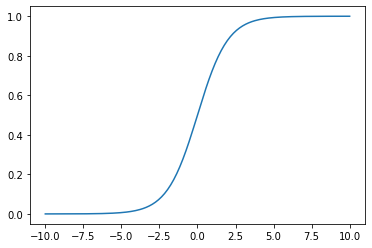

In [90]:
plt.plot(ys, res)

In [ ]:
#鸢尾花的分类预测

In [160]:
import sklearn.datasets as sd
import sklearn.model_selection as ms
import pandas as pd
import matplotlib.pyplot as plt
import sklearn.metrics as sm

In [95]:
iris = sd.load_iris()

In [112]:
print(iris.DESCR)
print(iris.keys())

"""
- sepal length in cm
- sepal width in cm
- petal length in cm
- petal width in cm
"""

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

'\n- sepal length in cm\n- sepal width in cm\n- petal length in cm\n- petal width in cm\n'

In [113]:
data = pd.DataFrame(iris.data, columns=iris.feature_names)

In [114]:
data

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [115]:
data['target'] = iris.target
data

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


<AxesSubplot:xlabel='sepal length (cm)', ylabel='sepal width (cm)'>

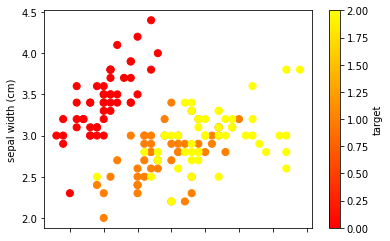

In [133]:
data.plot.scatter(x='sepal length (cm)', y='sepal width (cm)', c='target', s=50, cmap='autumn')

<AxesSubplot:xlabel='petal length (cm)', ylabel='petal width (cm)'>

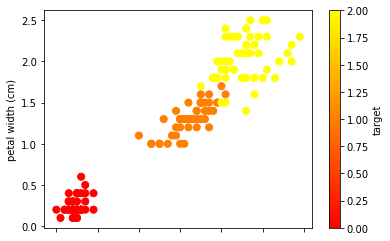

In [136]:
data.plot.scatter(x='petal length (cm)', y='petal width (cm)', c='target', s=50, cmap='autumn')

In [138]:
#挑选1，2类别数据
#sub_data = data.iloc[50:]
#sub_data = data.tail(100)
#sub_data = data[data['target'] == 1 | data['target'] == 2]
sub_data = data[~(data['target'] == 0)]

In [139]:
sub_data

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
50,7.0,3.2,4.7,1.4,1
51,6.4,3.2,4.5,1.5,1
52,6.9,3.1,4.9,1.5,1
53,5.5,2.3,4.0,1.3,1
54,6.5,2.8,4.6,1.5,1
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [157]:
x = sub_data.iloc[:, :-1]
y = sub_data.iloc[:, -1]

In [161]:
train_x, test_x, train_y, test_y = ms.train_test_split(x, y, test_size=0.1, random_state=7)

In [164]:
# 创建模型
# solver参数：逻辑函数中指数的函数关系（liblinear表示线性关系）
# C参数：正则强度，越大拟合效果越小，通过调整该参数防止过拟合
model = lm.LogisticRegression(solver='liblinear', C=1)

# 训练
model.fit(train_x, train_y)

# 预测
pred_y = model.predict(test_x)

In [164]:
#分类问题模型评估  正确个数/总的个数

In [165]:
print('准确率:', (test_y == pred_y).sum() / test_y.size)

准确率: 0.9


In [ ]:
#多分类问题

In [166]:
x = data.iloc[:, :-1]
y = data.iloc[:, -1]

In [168]:
train_x, test_x, train_y, test_y = ms.train_test_split(x, y, test_size=0.1, random_state=7)

In [191]:
train_x, test_x, train_y, test_y = ms.train_test_split(x, y, test_size=0.1, random_state=7, stratify=y)  #按照类别等比划分

In [192]:
# 创建模型
# solver参数：逻辑函数中指数的函数关系（liblinear表示线性关系）
# C参数：正则强度，越大拟合效果越小，通过调整该参数防止过拟合
model = lm.LogisticRegression(solver='liblinear', C=1)

score = ms.cross_val_score(model, train_x, train_y, cv=5, scoring='f1_weighted')

# 训练
model.fit(train_x, train_y)

# 预测
pred_y = model.predict(test_x)
print('准确率:', (test_y == pred_y).sum() / test_y.size)

准确率: 1.0


In [185]:
print("准确率:", sm.accuracy_score(test_y, pred_y))
print("查准率:", sm.precision_score(test_y, pred_y, average='macro'))
print("召回率:", sm.recall_score(test_y, pred_y, average='macro'))
print("F1率:", sm.f1_score(test_y, pred_y, average='macro'))

准确率: 0.9333333333333333
查准率: 0.9333333333333332
召回率: 0.9333333333333332
F1率: 0.9333333333333332


In [ ]:
#查准率：对的个数/预测出来的个数
#召回率：对的个数/真是的样本个数
#超准率和召回率是分开类别进行统计的，即每个类别都有自己的查准率和召回率（查全率）
#精度是总体进行统计的

In [ ]:
"""
0:查准率：1
  召回率：1
1 ：3/3=1
  ：3/7=0.42857142857142855
2:  3/7=0.42857142857142855
    3/3=1

运算技巧，先找出来准确预测的
"""

In [175]:
print(sm.confusion_matrix(test_y, pred_y))

[[5 0 0]
 [0 3 4]
 [0 0 3]]


In [176]:
#分类报告================================================================

In [186]:
sm.classification_report(test_y, pred_y)

'              precision    recall  f1-score   support\n\n           0       1.00      1.00      1.00        10\n           1       0.90      0.90      0.90        10\n           2       0.90      0.90      0.90        10\n\n    accuracy                           0.93        30\n   macro avg       0.93      0.93      0.93        30\nweighted avg       0.93      0.93      0.93        30\n'

In [193]:
print(sm.classification_report(test_y, pred_y))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       1.00      1.00      1.00         5
           2       1.00      1.00      1.00         5

    accuracy                           1.00        15
   macro avg       1.00      1.00      1.00        15
weighted avg       1.00      1.00      1.00        15



In [195]:
import sklearn.tree as st

In [194]:
import sklearn.tree as st
tree = st.DecisionTreeClassifier(max_depth=6)
model = se.AdaBoostClassifier(tree, n_estimators=100)
model2 = se.GradientBoostingClassifier(max_depth=6, n_estimators=400, min_samples_split=2)
model3 = se.RandomForestClassifier(max_depth=10, n_estimators=1000, min_samples_split=2)